## This is a TensorFlow + NumPy + PIL based script for detecting vertical and horizontal edges in an image using convolution filters.

#### 1. Imports
- tensorflow: used for the convolution operations.
- numpy: numerical operations like array creation.
- PIL.Image: for image loading and basic manipulation.
- matplotlib.pyplot: for displaying images.

In [16]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### 2. Load and Preprocess Image
- convert("L"): converts the image to grayscale (1 channel).
- resize((256, 256)): reduces image complexity for faster computation.
- np.array(...)/255.0: normalizes pixel values to the [0, 1] range.


In [17]:
image = Image.open("catsample.png").convert("L")  # Convert to grayscale
image = image.resize((256, 256))                 # Resize to 256x256
image = np.array(image, dtype=np.float32) / 255.0  # Normalize to [0, 1]

#### 3. Prepare Image Tensor for TensorFlow
Adds two new dimensions:
- axis=0: batch dimension (1 image)
- axis=-1: channel dimension (grayscale → 1 channel)

Final shape: (1, 256, 256, 1)
(Batch size, Height, Width, Channels)

In [18]:
image = np.expand_dims(image, axis=(0, -1))

#### 4. Define Edge Detection Filters
- vertical_filter: detects vertical edges
- horizontal_filter: detects horizontal edges

In [19]:
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1,  1,  1],
                              [0,  0,  0],
                              [-1, -1, -1]], dtype=np.float32)


#### 5. Reshape Filters for TensorFlow
Why reshape?
- TensorFlow expects filters in shape (kernel_height, kernel_width, in_channels, out_channels)
So we reshape from (3, 3) → (3, 3, 1, 1)

In [20]:
vertical_filter = vertical_filter.reshape(3, 3, 1, 1)
horizontal_filter = horizontal_filter.reshape(3, 3, 1, 1)

#### 6. Apply Convolution (Edge Detection)
- conv2d slides the filter over the image.
- strides=[1, 1, 1, 1]: no skipping; process every pixel.
- padding="SAME": output image has same size as input.

Now we have:
- vertical_edges: detects edges in vertical direction.
- horizontal_edges: detects edges in horizontal direction.


In [21]:
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding="SAME")

#### 7. Prepare Output for Visualization
- Convert from TensorFlow tensors to NumPy arrays.
- squeeze() removes batch and channel dimensions.

Now the shape is (256, 256) — good for visualization.

In [22]:
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

#### 8. Plot the Results
This draws 3 side-by-side plots:
- Original grayscale image
- Image showing vertical edges
- Image showing horizontal edges

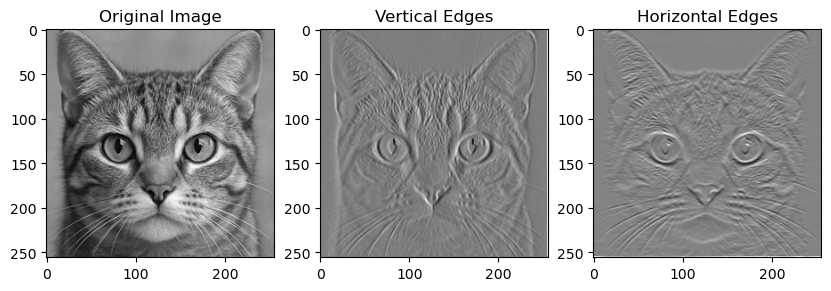

In [23]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edges")

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edges")

plt.show()


---
#### Blurring Image


#### 1. Import Required Libraries

- TensorFlow (tf): For defining and applying the convolution operation.
- NumPy: For numerical computations and image preparation.
- PIL (Pillow): To load and manipulate the image.
- Matplotlib: To display the original and blurred images.

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### 2. Load and Preprocess the Image
- Image.open("catsample.png"): Loads an image from disk.
- convert("L"): Converts it to grayscale (1 channel). L stands for luminance.
- resize((256, 256)): Ensures consistent size for computation.
- np.array(..., dtype=np.float32): Converts image to NumPy array with float precision.
- / 255.0: Normalizes pixel values to the range [0, 1], which is standard for neural network inputs

In [ ]:
image = Image.open("catsample.png").convert("L")  # Convert to grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Normalize to range [0,1]
print(image.shape, image.size)

(256, 256) 65536


#### 3. Add Batch and Channel Dimensions

Original shape of grayscale image: (256, 256)


Adds:
axis=0 → batch size (1 image)
axis=-1 → channel (1 for grayscale)

Why?
TensorFlow’s conv2d requires inputs of shape: (batch_size, height, width, channels)

In [4]:
image = np.expand_dims(image, axis=(0, -1)) ## Add batch and channel dimensions (1, 256, 256, 1)
print(image.shape, image.size)

(1, 256, 256, 1) 65536


#### 4. Define a 3×3 Blurring Filter (Averaging Kernel)
What this filter does:
This is a mean/box blur kernel. It averages the values of a 3×3 pixel window, creating a smoothing effect.

Every pixel in the output will be the average of itself and its 8 neighbors, which results in a blurring of the image — smoothing out details and edges.

In [5]:
blur_filter = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

#### 5. Reshape Filter for TensorFlow

TensorFlow expects filter/kernel shape: (kernel_height, kernel_width, input_channels, output_channels)
So:
 - 3x3: the filter size
 - 1: input channel (grayscale)
 - 1: output channel (one filtered image)

In [6]:
blur_filter = blur_filter.reshape(3, 3, 1, 1)
print(blur_filter.shape)

(3, 3, 1, 1)


#### 6. Apply Convolution to Blur the Image
Parameters:
- image: input tensor
- blur_filter: our filter kernel
- strides=[1, 1, 1, 1]: no skipping of pixels (standard 2D convolution)
- padding="SAME": keeps the output image the same size as input

The convolution process applies the blur filter across the image, averaging each 3×3 region.

In [20]:
blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1,2,2,1], padding="SAME")

#### 7. Prepare the Output for Plotting
- .numpy(): converts the TensorFlow tensor to a NumPy array.
- .squeeze(): removes unnecessary dimensions → shape becomes (256, 256).

In [21]:
blurred_image = blurred_image.numpy().squeeze()

#### 8. Plot Both Images for Comparison
- Creates a side-by-side comparison of:
- Left: the original grayscale image
- Right: the blurred version
- Removes axes for cleaner visualization.

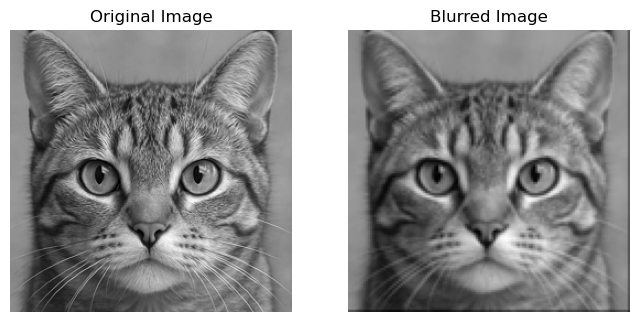

In [22]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.show()
